**Ganti Runtime ke GPU sebelum menjalankan kode**

Final Project Kelompok 2
NAZWA HILDA SYAFIRA
DIMAS BANGKIT SANJAYA

https://universe.roboflow.com/ppe-detection-bq0du/ppe-detection-jk137

In [1]:
!nvidia-smi

Tue Jul 22 07:02:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.0/112.6 GB disk)


In [4]:
# Seleksi Model Menggunakan Pre-trained Model Yolov8
%cd {HOME}
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 5.35M/5.35M [00:00<00:00, 110MB/s]
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 104k/104k [00:00<00:00, 142MB/s]
image 1/1 /content/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 46.4ms
Speed: 12.5ms preprocess, 46.4ms inference, 333.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


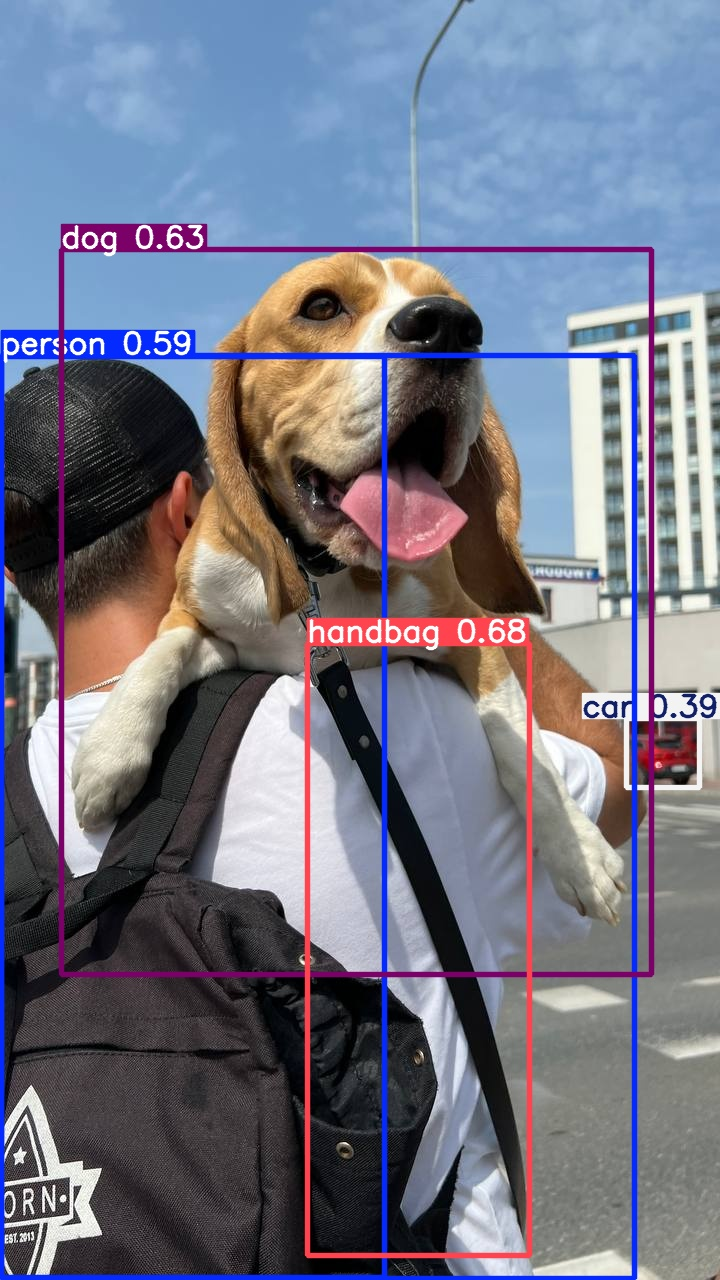

In [7]:
from IPython.display import Image, display
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpg', height=600)

**Sesuaikan dengan database dari Roboflow**

In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
# Pengumpulan Dataset dari Roboflow (sesuaikan dengan dataset masing2)
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aDq0yZzvUZJ9yUEQp0v9")
project = rf.workspace("ppe-detection-bq0du").project("ppe-detection-jk137")
version = project.version(5)
dataset = version.download("yolov11")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 103.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE-Detection-5 in yolov11:: 100%|██████████| 7318/7318 [00:01<00:00, 7028.88it/s]


In [9]:
# Training atau pelatihan model Yolov8 ke dataset yang sudah disiapkan dari Roboflow
%cd {HOME}
!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=20 imgsz=320 plots=True

/content
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/PPE-Detection-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

In [10]:
!ls {HOME}/runs/detect/train/

args.yaml			 labels.jpg	      train_batch2.jpg
BoxF1_curve.png			 results.csv	      val_batch0_labels.jpg
BoxP_curve.png			 results.png	      val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch2000.jpg  val_batch2_labels.jpg
confusion_matrix.png		 train_batch2001.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch2002.jpg  weights


/content


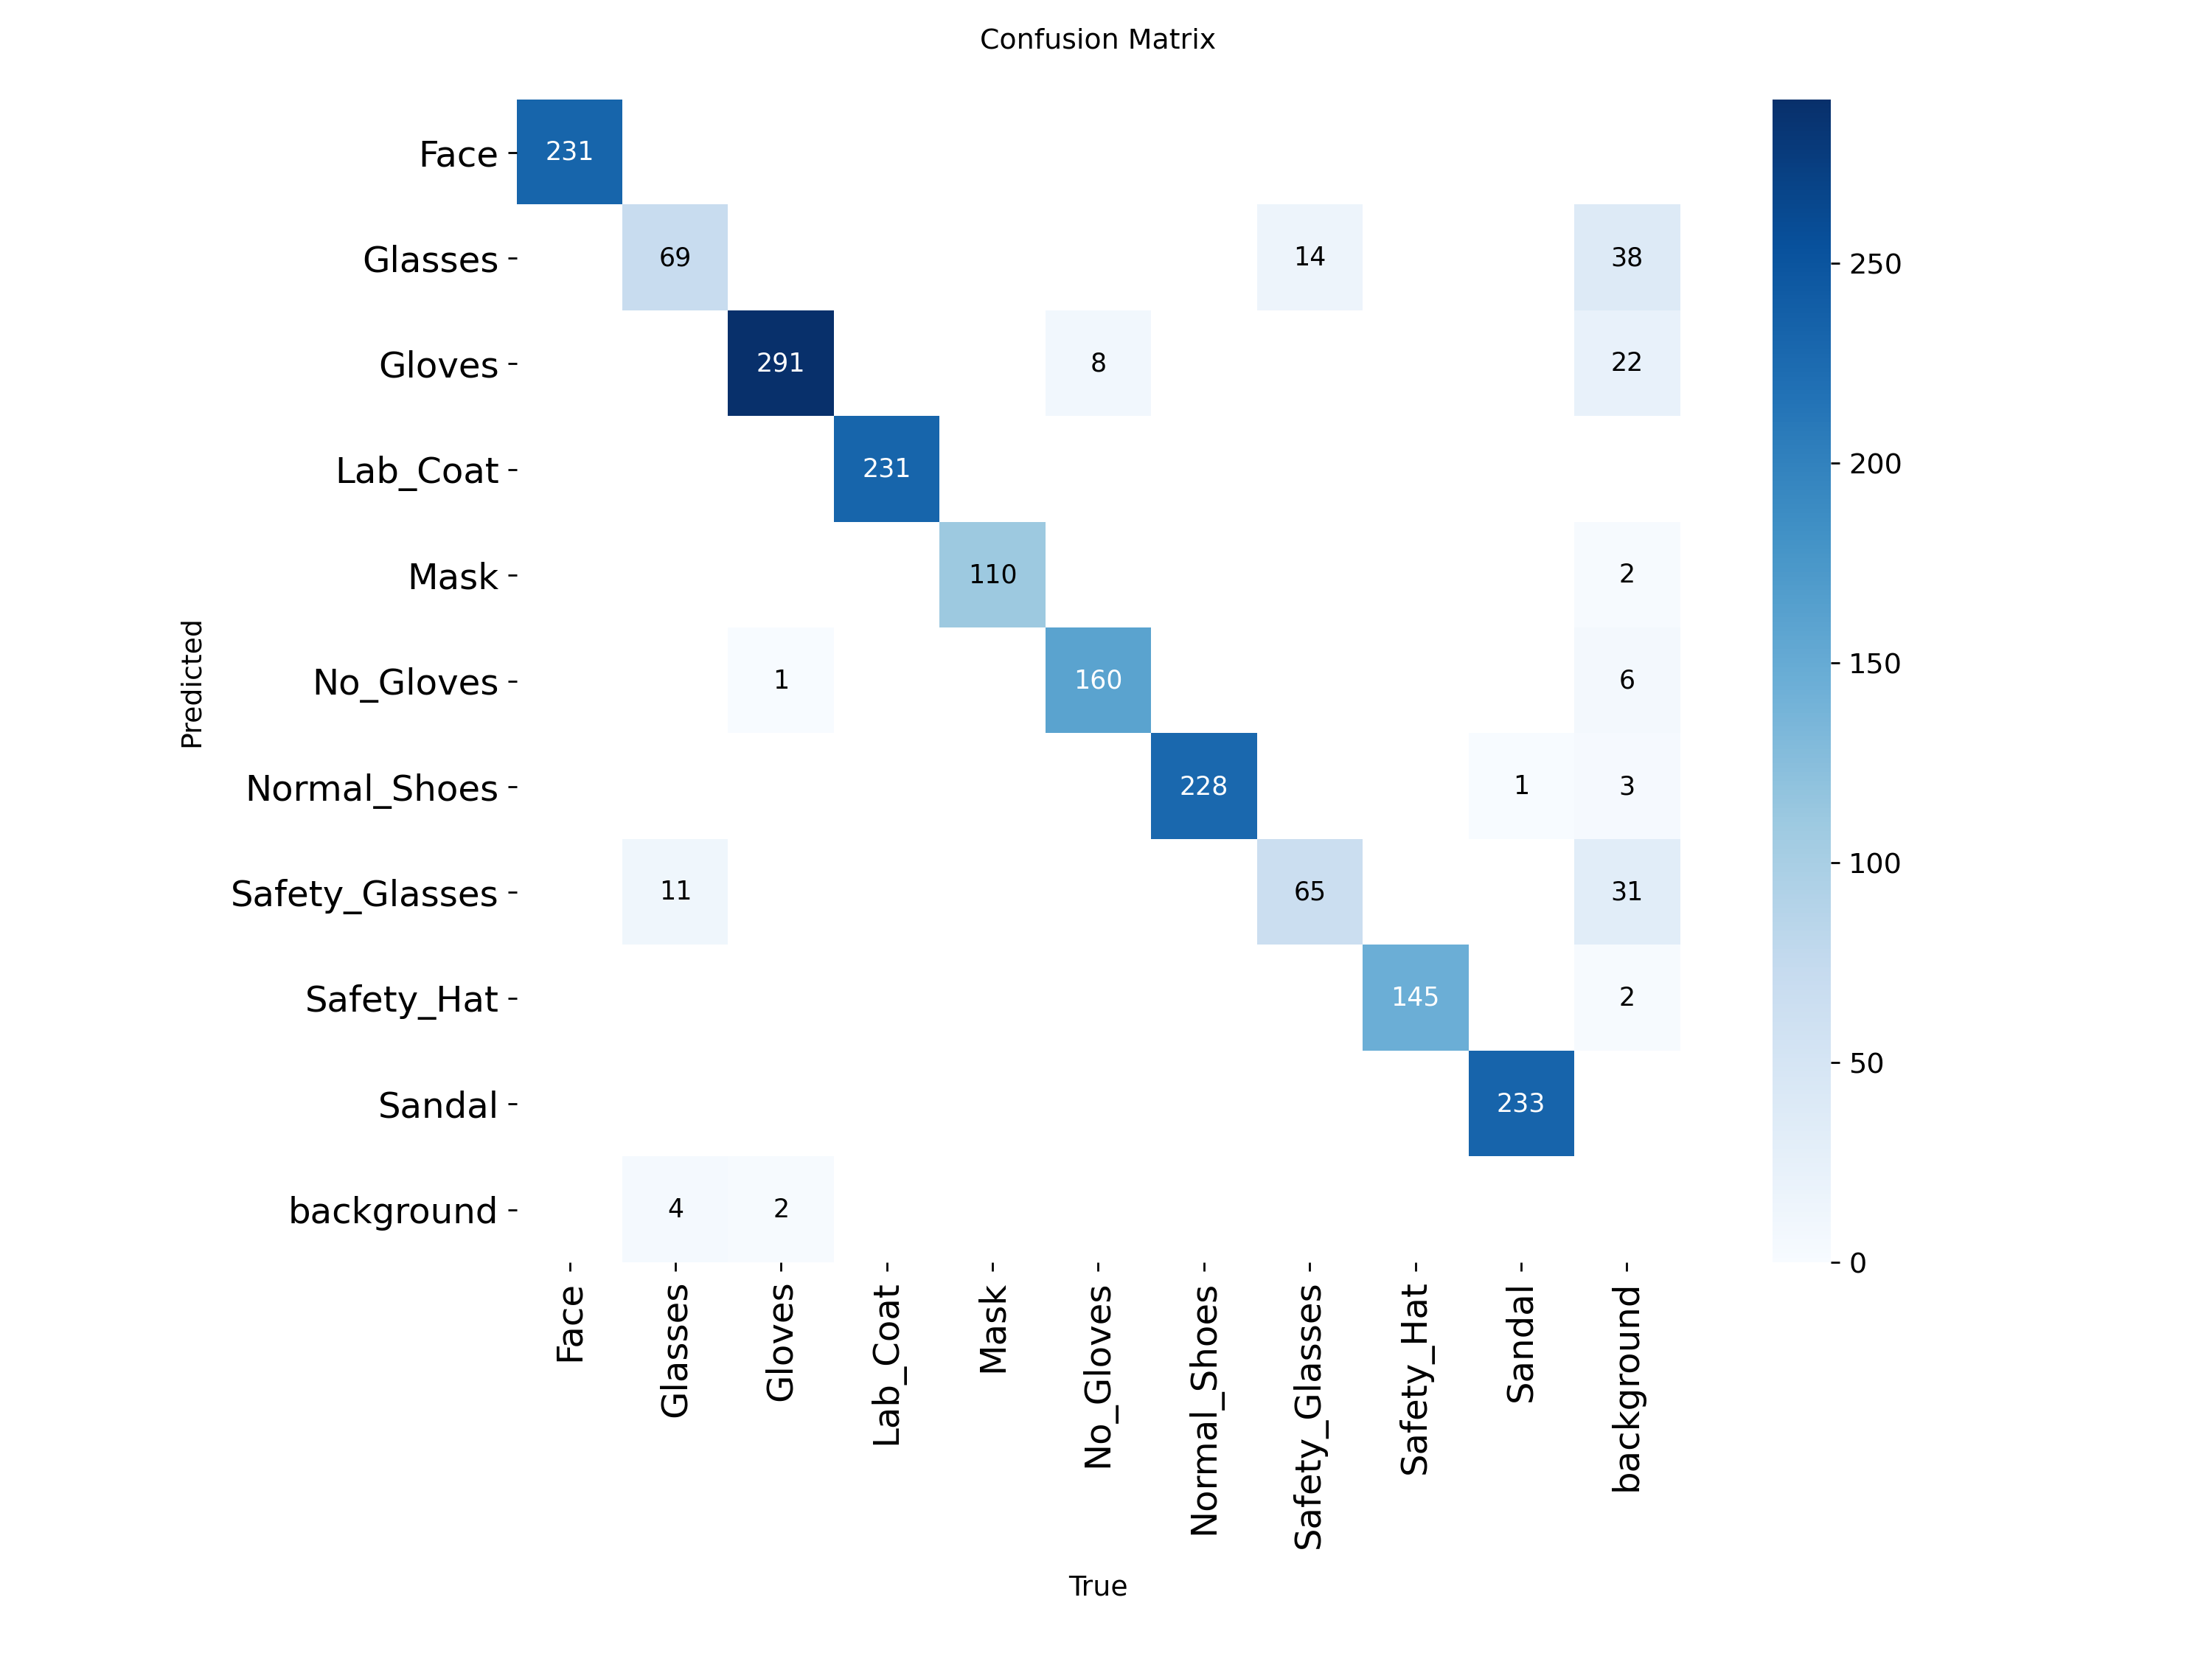

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


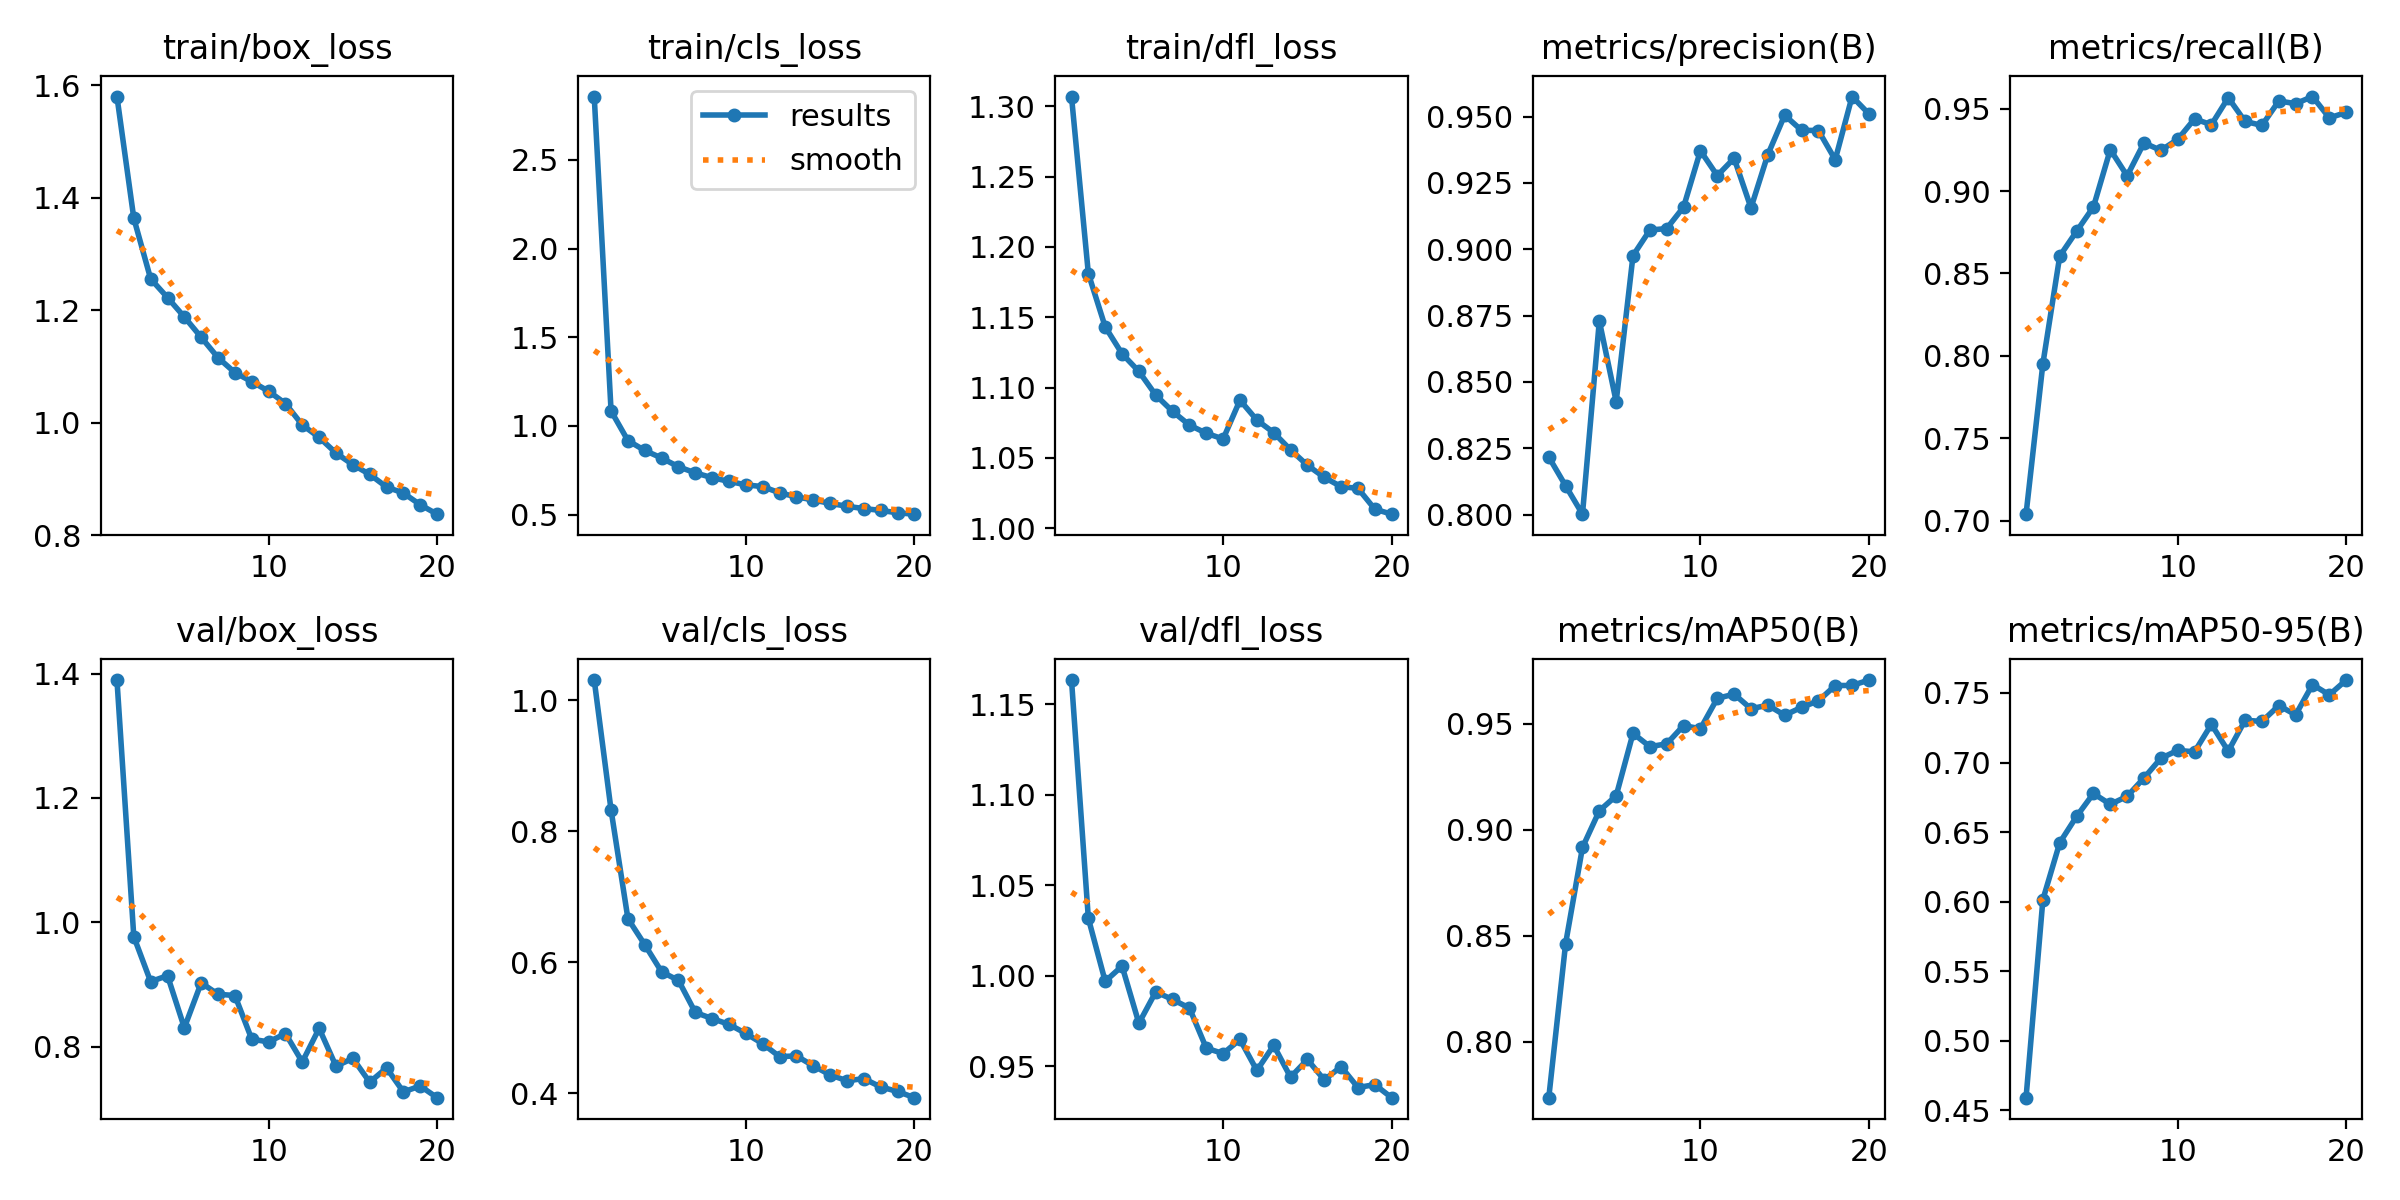

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


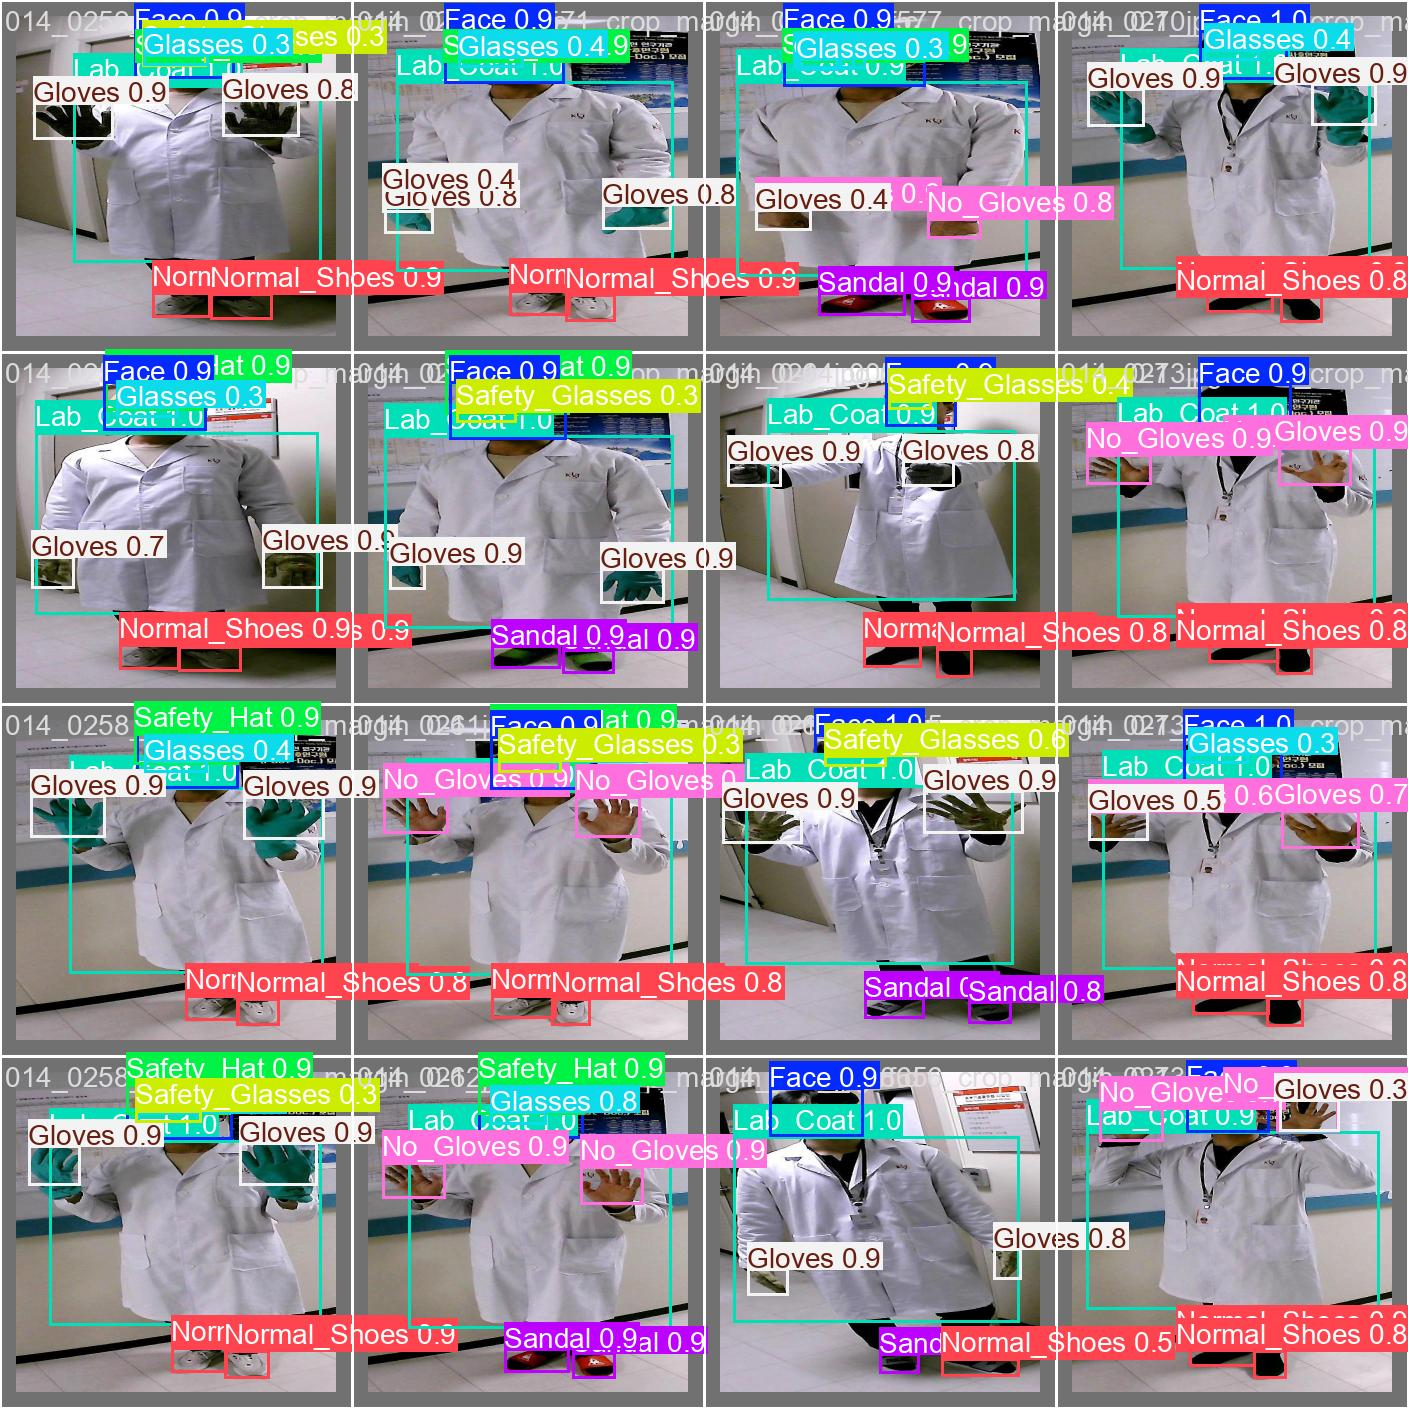

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [14]:
# Evalusai Model (Proses Validasi)
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1877.1±474.9 MB/s, size: 41.0 KB)
val: Scanning /content/datasets/PPE-Detection-5/valid/labels.cache... 231 images, 0 backgrounds, 0 corrupt: 100% 231/231 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:03<00:00,  4.90it/s]
                   all        231       1804      0.952      0.947       0.97      0.759
                  Face        231        231      0.997          1      0.995      0.888
               Glasses         84         84      0.732      0.726      0.836      0.452
                Gloves        147        294      0.954       0.99      0.991      0.721
              Lab_Coat        231        231      0.998          1      0.995      0.965
                  Mask        11

In [15]:
# Evaluasi Model (Proses Testing)
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs

image 1/227 /content/datasets/PPE-Detection-5/test/images/014_0261_008575_crop_margin_0-1_jpg.rf.6bb6647faaa656df06dd4255d65ec5f0.jpg: 320x320 1 Face, 1 Glasses, 1 Lab_Coat, 2 No_Glovess, 2 Normal_Shoess, 1 Safety_Hat, 21.1ms
image 2/227 /content/datasets/PPE-Detection-5/test/images/014_0261_008576_crop_margin_0-1_jpg.rf.f3b66fa9d9fadd2917ea3ce273590bff.jpg: 320x320 1 Face, 1 Glasses, 1 Gloves, 1 Lab_Coat, 2 No_Glovess, 2 Normal_Shoess, 1 Safety_Hat, 8.5ms
image 3/227 /content/datasets/PPE-Detection-5/test/images/014_0264_009207_crop_margin_0-1_jpg.rf.86b9bd7c03d4bb86a6a8fa1c79b43225.jpg: 320x320 1 Face, 2 Glovess, 1 Lab_Coat, 2 Normal_Shoess, 1 Safety_Glasses, 7.8ms
image 4/227 /content/datasets/PPE-Detection-5/test/images/014_0264_009208_crop_margin_0-1_jpg.rf.4677012dec9c49de7f40c8b2911bcee9.jpg: 320x320 1 Fac

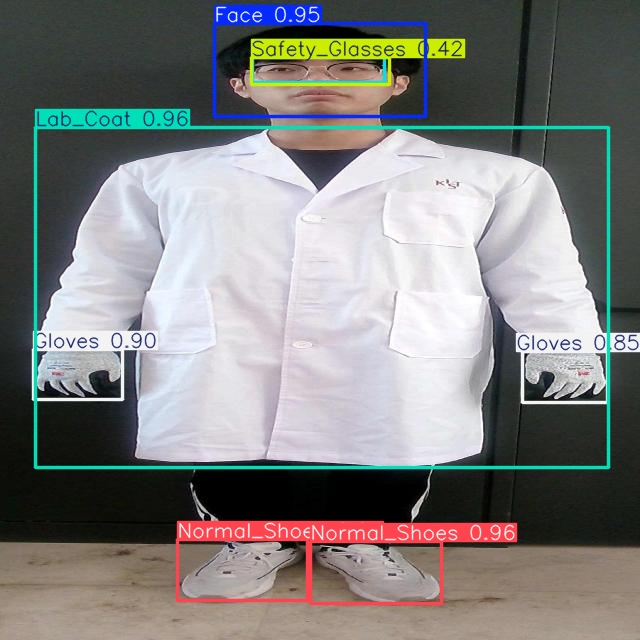

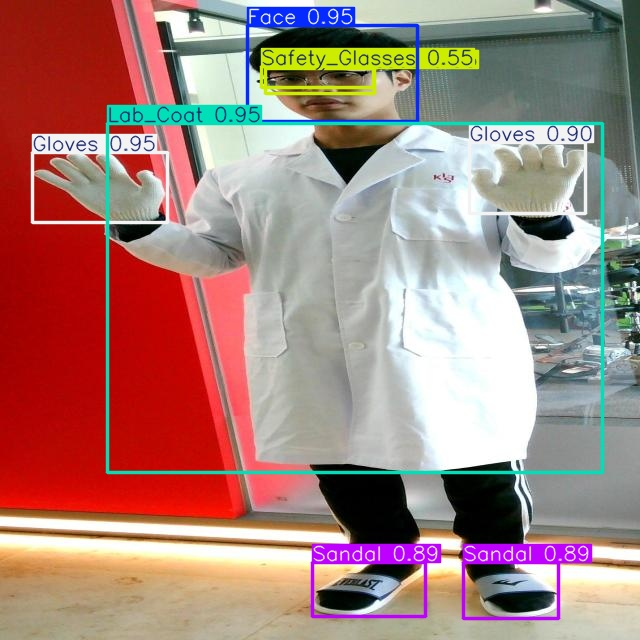

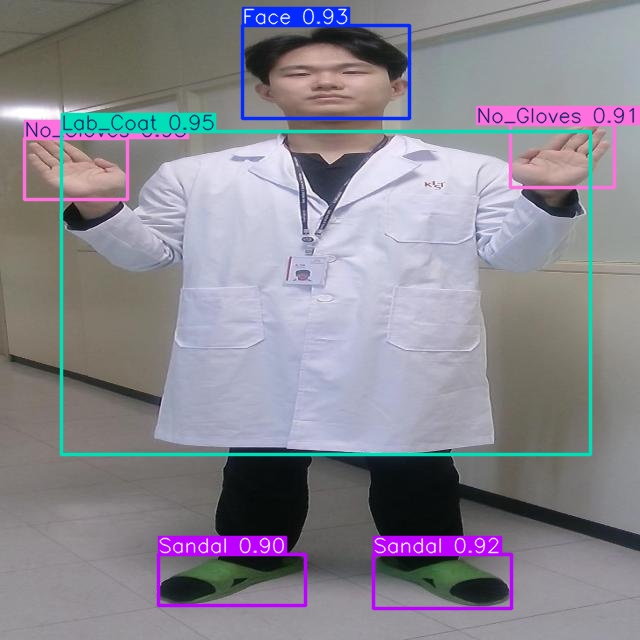

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [17]:
%cp -av "/content/runs" "/content/datasets/PPE-Detection-5"

'/content/runs' -> '/content/datasets/PPE-Detection-5/runs'
'/content/runs/detect' -> '/content/datasets/PPE-Detection-5/runs/detect'
'/content/runs/detect/predict' -> '/content/datasets/PPE-Detection-5/runs/detect/predict'
'/content/runs/detect/predict/dog.jpg' -> '/content/datasets/PPE-Detection-5/runs/detect/predict/dog.jpg'
'/content/runs/detect/train' -> '/content/datasets/PPE-Detection-5/runs/detect/train'
'/content/runs/detect/train/weights' -> '/content/datasets/PPE-Detection-5/runs/detect/train/weights'
'/content/runs/detect/train/weights/last.pt' -> '/content/datasets/PPE-Detection-5/runs/detect/train/weights/last.pt'
'/content/runs/detect/train/weights/best.pt' -> '/content/datasets/PPE-Detection-5/runs/detect/train/weights/best.pt'
'/content/runs/detect/train/args.yaml' -> '/content/datasets/PPE-Detection-5/runs/detect/train/args.yaml'
'/content/runs/detect/train/labels_correlogram.jpg' -> '/content/datasets/PPE-Detection-5/runs/detect/train/labels_correlogram.jpg'
'/conten

**Disconnect Runtime dan ganti ke CPU**

In [ ]:
!pip install ultralytics

In [ ]:
import shutil
shutil.copy("/content/drive/MyDrive/YoloApel2/runs/detect/train/weights/best.pt", "/content")

In [ ]:
# Deployment Model Ke Android (Konversi model menjadi format Tensorflow Lite)
!yolo export model=/content/best.pt format=tflite